## Import Dataset

In [1]:
from teaspoon.ML import load_datasets
import numpy as np
import pandas as pd
mnist = load_datasets.mnist()
mnist

,zero_dim_rtl,zero_dim_ltr,zero_dim_btt,zero_dim_ttb,one_dim_rtl,one_dim_ltr,one_dim_btt,one_dim_ttb,labels
0,"[[23.0, 50.0], [13.0, 20.0]]","[[24.0, 50.0], [11.0, 21.0]]","[[24.0, 50.0], [8.0, 9.0]]","[[23.0, 50.0]]",[],[],[],[],5
1,"[[22.0, 50.0]]","[[22.0, 50.0]]","[[23.0, 50.0]]","[[24.0, 50.0]]","[[0.0, 8.0]]","[[0.0, 8.0]]","[[0.0, 9.0]]","[[0.0, 8.0]]",0
2,"[[22.0, 50.0]]","[[25.0, 50.0]]","[[24.0, 50.0], [15.0, 16.0]]","[[23.0, 50.0], [13.0, 22.0]]",[],[],[],[],4
3,"[[21.0, 50.0]]","[[20.0, 50.0]]","[[24.0, 50.0]]","[[23.0, 50.0]]",[],[],[],[],1
4,"[[20.0, 50.0], [16.0, 18.0]]","[[22.0, 50.0], [14.0, 15.0]]","[[26.0, 50.0]]","[[21.0, 50.0]]","[[0.0, 9.0]]","[[0.0, 12.0]]","[[0.0, 9.0]]","[[0.0, 14.0]]",9
...,...,...,...,...,...,...,...,...,...
59995,"[[23.0, 50.0], [16.0, 17.0]]","[[22.0, 50.0], [16.0, 18.0]]","[[24.0, 50.0]]","[[23.0, 50.0]]","[[0.0, 13.0], [0.0, 7.0]]","[[0.0, 13.0], [0.0, 9.0]]","[[0.0, 16.0], [0.0, 6.0]]","[[0.0, 17.0], [0.0, 5.0]]",8
59996,"[[21.0, 50.0], [17.0, 18.0]]","[[24.0, 50.0], [12.0, 18.0], [9.0, 17.0]]","[[23.0, 50.0]]","[[24.0, 50.0], [7.0, 10.0]]",[],[],[],[],3
59997,"[[24.0, 50.0], [13.0, 18.0]]","[[23.0, 50.0], [12.0, 20.0]]","[[24.0, 50.0]]","[[23.0, 50.0], [5.0, 7.0]]",[],[],[],[],5
59998,"[[23.0, 50.0], [8.0, 21.0]]","[[22.0, 50.0], [11.0, 15.0]]","[[21.0, 50.0]]","[[26.0, 50.0], [8.0, 15.0]]","[[0.0, 17.0]]","[[0.0, 8.0]]","[[0.0, 15.0]]","[[0.0, 10.0]]",6


Create Dataset for Timing

In [2]:
timing_dgms = np.empty([1000,5], dtype=object)
for j in range(0,1000):
    three_dgms = []
    six_dgms = []
    ten_dgms = []
    twenty_dgms = []
    forty_dgms = []
    for i in range(0,3):
        birth = np.random.randint(0, 100, size=1)
        death = np.random.randint(birth, 100, size=1)
        point = [birth[0], death[0]]
        three_dgms.append(point)
    for i in range(0,6):
        birth = np.random.randint(0, 100, size=1)
        death = np.random.randint(birth, 100, size=1)
        point = [birth[0], death[0]]
        six_dgms.append(point)
    for i in range(0,10):
        birth = np.random.randint(0, 100, size=1)
        death = np.random.randint(birth, 100, size=1)
        point = [birth[0], death[0]]
        ten_dgms.append(point)
    for i in range(0,20):
        birth = np.random.randint(0, 100, size=1)
        death = np.random.randint(birth, 100, size=1)
        point = [birth[0], death[0]]
        twenty_dgms.append(point)
    for i in range(0,40):
        birth = np.random.randint(0, 100, size=1)
        death = np.random.randint(birth, 100, size=1)
        point = [birth[0], death[0]]
        forty_dgms.append(point)
    timing_dgms[j,0]=three_dgms
    timing_dgms[j,1]=six_dgms
    timing_dgms[j,2]=ten_dgms
    timing_dgms[j,3]=twenty_dgms
    timing_dgms[j,4]=forty_dgms
timing_dgms = pd.DataFrame(timing_dgms)
timing_dgms.columns = ['Length 3 dgms', 'Length 6 dgms', 'Length 10 dgms', 'Length 20 dgms', 'Length 40 dgms']
timing_dgms

,Length 3 dgms,Length 6 dgms,Length 10 dgms,Length 20 dgms,Length 40 dgms
0,"[[51, 66], [8, 46], [92, 96]]","[[67, 83], [95, 97], [58, 91], [90, 94], [41, ...","[[43, 87], [33, 33], [4, 74], [42, 90], [76, 9...","[[72, 98], [13, 78], [62, 96], [49, 75], [94, ...","[[49, 95], [11, 31], [25, 77], [88, 92], [72, ..."
1,"[[46, 82], [93, 94], [3, 23]]","[[85, 92], [94, 95], [72, 83], [42, 52], [21, ...","[[23, 41], [63, 75], [20, 89], [34, 84], [92, ...","[[33, 81], [79, 93], [79, 99], [79, 99], [80, ...","[[87, 97], [0, 29], [95, 95], [35, 45], [43, 7..."
2,"[[7, 58], [21, 72], [46, 46]]","[[22, 40], [17, 50], [79, 82], [12, 36], [32, ...","[[85, 99], [7, 88], [4, 99], [62, 69], [89, 95...","[[72, 77], [10, 31], [53, 57], [92, 95], [43, ...","[[18, 64], [96, 98], [85, 88], [62, 84], [63, ..."
3,"[[7, 30], [75, 85], [7, 41]]","[[84, 90], [8, 46], [8, 37], [33, 63], [25, 60...","[[6, 10], [14, 85], [76, 95], [8, 87], [80, 87...","[[79, 93], [94, 95], [85, 92], [29, 63], [35, ...","[[95, 98], [21, 81], [57, 77], [88, 90], [91, ..."
4,"[[66, 70], [55, 65], [79, 81]]","[[50, 96], [80, 97], [2, 27], [7, 20], [66, 90...","[[68, 93], [91, 93], [96, 99], [90, 98], [61, ...","[[13, 48], [54, 79], [7, 66], [3, 98], [24, 92...","[[8, 67], [57, 90], [73, 78], [89, 89], [15, 5..."
...,...,...,...,...,...
995,"[[21, 54], [49, 73], [28, 38]]","[[41, 64], [71, 90], [72, 82], [68, 75], [44, ...","[[97, 97], [66, 66], [22, 81], [21, 22], [58, ...","[[95, 95], [76, 89], [53, 87], [50, 69], [93, ...","[[85, 88], [41, 78], [81, 94], [59, 69], [8, 8..."
996,"[[28, 40], [43, 71], [67, 91]]","[[91, 92], [98, 99], [2, 99], [25, 57], [79, 8...","[[19, 41], [60, 78], [48, 77], [7, 70], [65, 9...","[[16, 81], [71, 94], [63, 92], [33, 47], [2, 5...","[[54, 83], [10, 56], [59, 77], [0, 91], [63, 7..."
997,"[[37, 56], [58, 91], [34, 38]]","[[43, 93], [75, 86], [35, 50], [41, 54], [36, ...","[[37, 84], [11, 84], [34, 87], [41, 60], [1, 8...","[[49, 64], [24, 86], [17, 72], [33, 41], [37, ...","[[5, 74], [81, 81], [32, 45], [17, 85], [72, 9..."
998,"[[36, 36], [15, 41], [25, 88]]","[[73, 86], [77, 88], [43, 56], [30, 65], [20, ...","[[97, 99], [88, 90], [71, 71], [72, 81], [84, ...","[[72, 94], [25, 79], [53, 89], [30, 47], [18, ...","[[82, 86], [52, 71], [22, 87], [98, 99], [96, ..."


### Fill Missing Data in One Dimension

In [2]:
def fill_missing(dim_1):
    for i in range(0, len(dim_1)):
        if len(dim_1[i])== 0:
            dim_1[i] = np.array([[0,.01]])
        else: 
            dim_1[i] = dim_1[i]
    return dim_1

In [3]:
import warnings
warnings.filterwarnings('ignore')
mnist['one_dim_rtl'] = fill_missing(mnist['one_dim_rtl'])
mnist['one_dim_ltr'] = fill_missing(mnist['one_dim_ltr'])
mnist['one_dim_btt'] = fill_missing(mnist['one_dim_btt'])
mnist['one_dim_ttb'] = fill_missing(mnist['one_dim_ttb'])

### Choose Dimension for Timing Test

In [3]:
def train_test_split_sklearn(DgmsFD, labels_col, train_size=.05, seed=12):
    from sklearn.model_selection import train_test_split
    labels = DgmsFD[labels_col]
    training_dgms, testing_dgms = train_test_split(DgmsFD, train_size=train_size, random_state=seed, stratify=labels)
    return training_dgms.reset_index(), testing_dgms.reset_index()

In [4]:
dgms_3 = timing_dgms['Length 3 dgms']
dgms_6 = timing_dgms['Length 6 dgms']
dgms_10 = timing_dgms['Length 10 dgms']
dgms_20 = timing_dgms['Length 20 dgms']
dgms_40 = timing_dgms['Length 40 dgms']

In [6]:
dgms_train, dgms_test = train_test_split_sklearn(mnist, 'labels', train_size = .05)
xdgm0_train = dgms_train['zero_dim_rtl']
xdgm0_test = dgms_test['zero_dim_rtl']
xdgm1_train = dgms_train['one_dim_rtl']
xdgm1_test = dgms_test['one_dim_rtl']
labels_train = dgms_train['labels']
labels_test = dgms_test['labels']

### Load original persistence images method function from teaspoon and update for parallel flag

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from persim import PersistenceImager
import math
from math import pi
from numpy.linalg import norm as lnorm
from sympy.abc import t
from sympy import Piecewise
from sympy import diff, integrate
from itertools import combinations
from numba import jit
from numba import prange
import multiprocessing

def F_Image(PD1, PS, var, plot, D_Img=[], pers_imager=None, training=True, parallel=False):
    
    output = {}
    # number of persistence diagrams
    N1 = len(PD1)

    if training == True:
        # adjust the image parameters and compute images
        pers_imager = PersistenceImager()
        pers_imager.pixel_size = PS
        pers_imager.kernel_params = {'sigma': var}

        PDs = PD1.tolist()
        pers_imager.fit(PDs, skew=True)
        if parallel==True:
            pers_img = pers_imager.transform(PD1, skew=True, n_jobs=multiprocessing.cpu_count())
        else:
            pers_img = pers_imager.transform(PD1, skew=True)
    else:
        pers_img = [pers_imager.transform(PD1[i], skew=True) for i in np.arange(0, N1, 1)]

    # generate feature matrix
    feature_PI = np.zeros(
        (N1, len(pers_img[0][:, 0])*len(pers_img[0][0, :])))
    for i in range(N1):
        feature_PI[i, :] = pers_img[i].flatten()

    # plot all images or images of certain persistence diagrams
    if plot == True:
        fig = []
        if D_Img == []:
            D_Img = np.arange(1, 2, 1)
        for i in range(len(D_Img)):
            plt.figure()
            ax = plt.gca()
            pimgr = PersistenceImager()
            pimgr.pixel_size = PS
            pimgr.kernel_params = {'sigma': var}
            pimgr.fit(PD1[D_Img[i]-1], skew=True)
            imgs = pimgr.transform(PD1[D_Img[i]-1], skew=True)
            pers_imager.plot_image(imgs, ax)
            fig.append(plt.gcf())
        output['figures'] = fig

    output['F_Matrix'] = feature_PI
    output['pers_imager'] = pers_imager

    return output

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from persim import PersistenceImager
import math
from math import pi
from numpy.linalg import norm as lnorm
from sympy.abc import t
from sympy import Piecewise
from sympy import diff, integrate
from itertools import combinations

def F_Image(PD1, PS, var, plot, D_Img=[], pers_imager=None, training=True):
    

    output = {}
    # number of persistence diagrams
    N1 = len(PD1)

    if training == True:
        # adjust the image parameters and compute images
        pers_imager = PersistenceImager()
        pers_imager.pixel_size = PS
        pers_imager.kernel_params = {'sigma': var}

        PDs = PD1.tolist()
        pers_imager.fit(PDs, skew=True)
        pers_img = [pers_imager.transform(PD1[i], skew=True) for i in np.arange(0, N1, 1)]
    else:
        pers_img = [pers_imager.transform(PD1[i], skew=True) for i in np.arange(0, N1, 1)]

    # generate feature matrix
    feature_PI = np.zeros(
        (N1, len(pers_img[0][:, 0])*len(pers_img[0][0, :])))
    for i in range(N1):
        feature_PI[i, :] = pers_img[i].flatten()

    # plot all images or images of certain persistence diagrams
    if plot == True:
        fig = []
        if D_Img == []:
            D_Img = np.arange(1, 2, 1)
        for i in range(len(D_Img)):
            plt.figure()
            ax = plt.gca()
            pimgr = PersistenceImager()
            pimgr.pixel_size = PS
            pimgr.kernel_params = {'sigma': var}
            pimgr.fit(PD1[D_Img[i]-1], skew=True)
            imgs = pimgr.transform(PD1[D_Img[i]-1], skew=True)
            pers_imager.plot_image(imgs, ax)
            fig.append(plt.gcf())
        output['figures'] = fig

    output['F_Matrix'] = feature_PI
    output['pers_imager'] = pers_imager

    return output

In [9]:
dgms_3_train = dgms_3[0:10]
%timeit output0 = F_Image(dgms_3_train, PS=1, var=2, plot=False, training=True)
%timeit output1 = F_Image_parallel(dgms_3_train, PS=1, var=2, plot=False, training=True)

1.19 ms ± 1.75 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
13 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
def reshape_persistence_diagrams(dgm):
    dgm_reshape = np.array([])
    num_dgms = len(dgm)
    for i in range(0,num_dgms):
        t = np.repeat(i, len(dgm[i]))
        t = t.reshape(len(dgm[i]),1)
        t1 = np.concatenate((t,dgm[i]),1)
        if i == 0:
            dgm_reshape = t1
        else:
            dgm_reshape = np.append(dgm_reshape, t1, 0)
    dummy = np.zeros((num_dgms))
    return dgm_reshape, num_dgms, dummy

In [19]:
from numba import jit
@jit(nopython=True, parallel=True)
def pers_reshape_par(dgms):
    n = dgms[1].shape[0]
    m = dgms[1].shape[1]
    r = len(dgms)
    result = np.zeros((r, n*m))
    for i in range(0,r):
        for j in range(0,n):
            for k in range(0,m):
                result[i, k+m*j] = dgms[i][j][k]
    return result 

In [20]:
from numba import jit
@jit(nopython=True)
def pers_reshape(dgms):
    n = dgms[1].shape[0]
    m = dgms[1].shape[1]
    r = len(dgms)
    result = np.zeros((r, n*m))
    for i in range(0,r):
        for j in range(0,n):
            for k in range(0,m):
                result[i, k+m*j] = dgms[i][j][k]
    return result 

In [11]:
from numba import vectorize
@vectorize
def pers_reshape_vec(dgms):
    n = dgms[1].shape[0]
    m = dgms[1].shape[1]
    r = len(dgms)
    result = np.zeros((r, n*m))
    for i in range(0,r):
        for j in range(0,n):
            for k in range(0,m):
                result[i, k+m*j] = dgms[i][j][k] 

In [12]:

def pers_reshape(dgms):
    n = dgms[1].shape[0]
    m = dgms[1].shape[1]
    r = len(dgms)
    return np.reshape(dgms, (r, n+m))

In [1422]:
import time
import multiprocessing
cpu_count = multiprocessing.cpu_count()
pers_imager = PersistenceImager()
pers_imager.pixel_size = .1
pers_imager.kernel_params = {'sigma': 1}
seed = [0,1,2,3,4]
train_size = [25, 100, 200, 300, 500]
n = len(train_size)
timing = np.zeros((n,4))
for i in range(0,n):
    for j in seed:
        print("Seed is: ", j)
        dgms_train, dgms_test = train_test_split_sklearn(mnist, 'labels', train_size = train_size[i], seed=j)
        xdgm0_train = np.array(dgms_train['zero_dim_rtl'])
        timing[i,0] += len(xdgm0_train)
        print("Done with sampling")

        start = time.time()
        output = F_Image_parallel(xdgm0_train, PS=.1, var=1, plot=False, training=True)
        end = time.time()-start
        timing[i,1] +=end
        print("Done with parallel")

        start = time.time()
        pers_imager.fit(xdgm0_train)
        X_train_features = np.array(pers_imager.transform(xdgm0_train))
        X_train_features = pers_reshape(X_train_features)
        end = time.time()-start
        timing[i,2] +=end
        print("Done with serial")

        start = time.time()
        output = F_Image(xdgm0_train, PS=.1, var=1, plot=False, training=True)
        end = time.time()-start
        timing[i,3] +=end
        print("Done with original")

    print("Finished Training ", i)
timing = pd.DataFrame(timing/5)
timing.columns=['Observations', 'Parallel (8 cores)', 'Single Core', 'Prior Function']
print(timing)

Seed is:  0
Done with sampling
Done with parallel
Done with serial
Done with original
Seed is:  1
Done with sampling
Done with parallel
Done with serial
Done with original
Seed is:  2
Done with sampling
Done with parallel
Done with serial
Done with original
Seed is:  3
Done with sampling
Done with parallel
Done with serial
Done with original
Seed is:  4
Done with sampling
Done with parallel
Done with serial
Done with original
Finished Training  0
Seed is:  0
Done with sampling
Done with parallel
Done with serial
Done with original
Seed is:  1
Done with sampling
Done with parallel
Done with serial
Done with original
Seed is:  2
Done with sampling
Done with parallel
Done with serial
Done with original
Seed is:  3
Done with sampling
Done with parallel
Done with serial
Done with original
Seed is:  4
Done with sampling
Done with parallel
Done with serial
Done with original
Finished Training  1
Seed is:  0
Done with sampling
Done with parallel
Done with serial
Done with original
Seed is:  1


Text(0, 0.5, 'Time in Seconds')

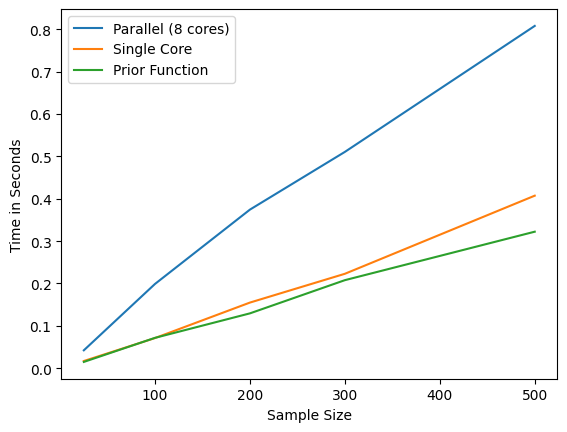

In [1423]:
t = timing.plot(x='Observations')
t.set_xlabel("Sample Size")
t.set_ylabel("Time in Seconds")

In [1434]:
import time
import multiprocessing
cpu_count = multiprocessing.cpu_count()
pers_imager = PersistenceImager()
pers_imager.pixel_size = 1
pers_imager.kernel_params = {'sigma': 1}
seed = [0,1,2,3,4]
train_size = [25, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
n = len(train_size)
timing = np.zeros((n,5))
for i in range(0,n):
    for j in seed:
        print("Seed is: ", j)
        dgms_train = dgms_20[0:train_size[i]]
        xdgm0_train = np.array(dgms_train)
        timing[i,0] += len(xdgm0_train)
        print("Done with sampling")

        start = time.time()
        output = F_Image_parallel(xdgm0_train, PS=1, var=1, plot=False, training=True)
        end = time.time()-start
        timing[i,1] +=end
        print("Done with parallel (original)")

        start = time.time()
        pers_imager.fit(xdgm0_train)
        X_train_features = np.array(pers_imager.transform(xdgm0_train))
        X_train_features = pers_reshape(X_train_features)
        end = time.time()-start
        timing[i,2] +=end
        print("Done with serial")

        start = time.time()
        output = F_Image(xdgm0_train, PS=1, var=1, plot=False, training=True)
        end = time.time()-start
        timing[i,3] +=end
        print("Done with original")

        start = time.time()
        pers_imager.fit(xdgm0_train)
        X_train_features = np.array(pers_imager.transform(xdgm0_train, n_jobs=8))
        X_train_features = pers_reshape(X_train_features)
        end = time.time()-start
        timing[i,4] +=end
        print("Done with parallel")

    print("Finished Training ", i)
timing = pd.DataFrame(timing/5)
timing.columns=['Observations', 'Parallel (8 cores)', 'Single Core', 'Prior Function', 'Parallel New Function']
print(timing)

Seed is:  0
Done with sampling
Done with parallel (original)
Done with serial
Done with original
Done with parallel
Seed is:  1
Done with sampling
Done with parallel (original)
Done with serial
Done with original
Done with parallel
Seed is:  2
Done with sampling
Done with parallel (original)
Done with serial
Done with original
Done with parallel
Seed is:  3
Done with sampling
Done with parallel (original)
Done with serial
Done with original
Done with parallel
Seed is:  4
Done with sampling
Done with parallel (original)
Done with serial
Done with original
Done with parallel
Finished Training  0
Seed is:  0
Done with sampling
Done with parallel (original)
Done with serial
Done with original
Done with parallel
Seed is:  1
Done with sampling
Done with parallel (original)
Done with serial
Done with original
Done with parallel
Seed is:  2
Done with sampling
Done with parallel (original)
Done with serial
Done with original
Done with parallel
Seed is:  3
Done with sampling
Done with parallel (

Text(0, 0.5, 'Time in Seconds')

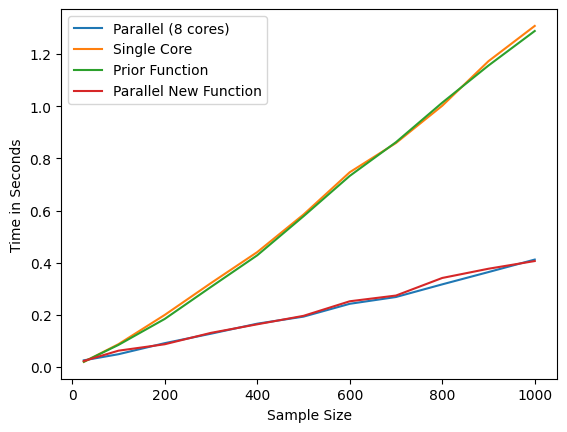

In [1435]:
t = timing.plot(x='Observations')
t.set_xlabel("Sample Size")
t.set_ylabel("Time in Seconds")

In [1324]:
dgms_train, dgms_test = train_test_split_sklearn(mnist, 'labels', train_size = 100)
xdgm0_train = dgms_train['zero_dim_rtl']
output0 = F_Image(xdgm0_train, PS=8, var=1, plot=False, training=True)
output0['F_Matrix'].shape

(100, 20)

In [1325]:
from persim import PersistenceImager
pers_imager = PersistenceImager()
pers_imager.fit(xdgm0_train)
pers_imager.pixel_size = 1
outputn = np.array(pers_imager.transform(xdgm0_train))
output1 = pers_reshape(outputn)

In [1326]:
print(pers_imager)

PersistenceImager(birth_range=(0.0, 26.0), pers_range=(1.0, 35.0), pixel_size=1, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})


<Axes: xlabel='birth', ylabel='persistence'>

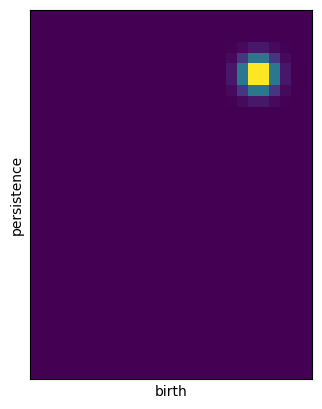

In [1327]:
pers_imager.plot_image(outputn[0])

In [10]:
def reshape_persistence_diagrams(dgm):
    dgm_reshape = np.array([])
    num_dgms = len(dgm)
    for i in range(0,num_dgms):
        t = np.repeat(i, len(dgm[i]))
        t = t.reshape(len(dgm[i]),1)
        t1 = np.concatenate((t,dgm[i]),1)
        if i == 0:
            dgm_reshape = t1
        else:
            dgm_reshape = np.append(dgm_reshape, t1, 0)
    dummy = np.zeros((num_dgms))
    return dgm_reshape, num_dgms, dummy

In [13]:
dgm_reshape, num_dgms, dummy = reshape_persistence_diagrams(dgms_3_train)

Write New Function

In [11]:
from numba import jit
@jit(nopython=True)
def mult(A, B):
    n = A.shape[0]
    m = B.shape[1]
    r = B.shape[0]
    result = np.zeros((n,m))
    for i in range(0,n):
        for j in range(0,m):
            for k in range(0,r):
                result[i,j]+=A[i,k]*B[k,j]
    return(result)

@jit(nopython=True)
def birth_persistence(Xdgms):
    birth = Xdgms[:,1]
    death = Xdgms[:,2]
    persistence = Xdgms[:,2] - Xdgms[:,1]
    diagram = Xdgms[:,0]
    return birth, death, persistence, diagram

@jit(nopython=True)
def gaussianpdf(mean = np.array([[0,0]], dtype=float), point = np.array([[0,0]], dtype=float), sigma=np.array([[2,0],[0,2]], dtype=float)):
    exponent = mult(mult((mean-point), np.linalg.inv(sigma)), np.transpose(mean-point))
    denominator = np.sqrt(np.power((2*pi),2)*np.linalg.det(sigma))
    distribution = 1/denominator*np.exp(-1/2*exponent)
    return distribution

@jit(nopython=True)
def feature_intervals(birth, persistence, x_pixel_size=1, y_pixel_size = 1):
    x_start = np.min(birth)
    y_start = np.min(persistence)
    x_end = np.max(birth)
    y_end = np.max(persistence)
    x_length = x_end - x_start + x_pixel_size
    n = int(np.ceil(x_length/x_pixel_size))
    x_intervals = np.zeros((n,1))
    x_intervals[0] = x_start
    for i in range(1,n):
        x_intervals[i] = x_intervals[i-1]+x_pixel_size
    x_factor = x_intervals[n-1] - x_end
    x_intervals = x_intervals - x_factor/2
    y_length = y_end - y_start + y_pixel_size
    m = int(np.ceil(y_length/y_pixel_size))
    y_intervals = np.zeros((m,1))
    y_intervals[0] = y_start
    for i in range(1,m):
        y_intervals[i] = y_intervals[i-1]+y_pixel_size
    y_factor = y_intervals[m-1] - y_end
    y_intervals = y_intervals - y_factor/2
    
    return x_intervals, y_intervals

@jit(nopython=True)
def pers_images(diagram, birth, persistence, x_intervals, y_intervals, num_dgms, sigma=np.array([[2,0],[0,2]], dtype=float)):
    n = len(x_intervals)
    m = len(y_intervals)
    persistence_images = np.zeros((num_dgms,(n-1)*(m-1)))
    plot_size = np.array([n-1,m-1])
    for i in range(1,n):
        for j in range(1,m):
            x = (x_intervals[i] + x_intervals[i-1])/2
            y = (y_intervals[j] + y_intervals[j-1])/2
            x_len = x_intervals[i] - x_intervals[i-1]
            y_len = y_intervals[j] - y_intervals[j-1]
            for k in range(0,num_dgms):
                #diagrams = np.transpose(np.array([diagram, birth, persistence]))
                index = np.where(diagram==k)[0]
                means = np.stack((birth, persistence), axis=1)
                for l in index:
                    mvmeans = np.array([[means[l, :][0],means[l, :][1]]])
                    point = np.array([[x[0],y[0]]])
                    area = float(y_len[0]*x_len[0])
                    value = gaussianpdf(mean=mvmeans, point=point, sigma=sigma)*y*area
                    persistence_images[k,j-1+(m-1)*(i-1)] = persistence_images[k,j-1+(m-1)*(i-1)] + value[0][0]
    return persistence_images, plot_size

@jit(nopython=True)
def persistenceImageFeatures(birth, persistence, diagram, num_dgms, xps=2, yps=2):
    x_intervals, y_intervals = feature_intervals(birth, persistence, x_pixel_size = xps, y_pixel_size = yps)
    t, plot_size = pers_images(diagram, birth, persistence, x_intervals, y_intervals, num_dgms)
    return t, plot_size


In [16]:
dgms_3_train = np.array(dgms_3[0:25])
dgm_reshape, num_dgms, dummy = reshape_persistence_diagrams(dgms_3_train)
birth, death, persistence, diagram= birth_persistence(dgm_reshape)
x_intervals, y_intervals = feature_intervals(birth, persistence, x_pixel_size = 1, y_pixel_size = 1)
t, plot_size = pers_images(diagram, birth, persistence, x_intervals, y_intervals, num_dgms)

In [17]:
%timeit t, plot_size = persistenceImageFeatures(birth, persistence, diagram, num_dgms, xps=1, yps=1)
%timeit output0 = F_Image(dgms_3[0:25], PS=1, var=2, plot=False, training=True)

1.03 s ± 5.66 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.3 ms ± 63.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
output0 = F_Image(xdgm0_train[0:10], PS=1, var=2, plot=False, training=True)
t, plot_size = persistenceImageFeatures(birth, persistence, diagram, num_dgms, xps=1, yps=1)

<Axes: xlabel='birth', ylabel='persistence'>

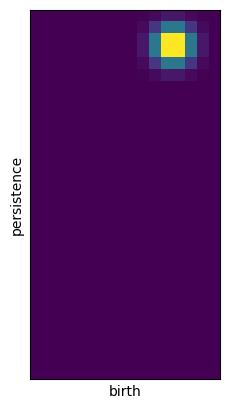

In [19]:
from persim import PersistenceImager
pers_imager = PersistenceImager()
pers_imager.fit(xdgm0_train[0:10])
pers_imager.pixel_size = 1
outputn = np.array(pers_imager.transform(xdgm0_train[0:10]))
pers_imager.plot_image(outputn[0])

<Axes: xlabel='birth', ylabel='persistence'>

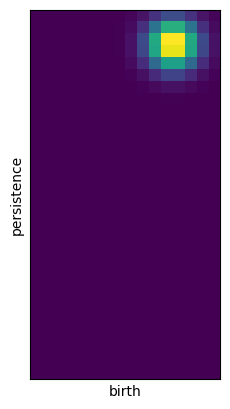

In [20]:
pers_imager.plot_image(np.reshape(t[0], plot_size))

In [ ]:
import time
import multiprocessing
cpu_count = multiprocessing.cpu_count()
pers_imager = PersistenceImager()
pers_imager.pixel_size = 1
pers_imager.kernel_params = {'sigma': 2}
seed = [0,1,2,3,4]
train_size = [25, 50] #100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
n = len(train_size)
timing = np.zeros((n,4))
for i in range(0,n):
    for j in seed:
        print("Seed is: ", j)
        dgms_train = dgms_10[0:train_size[i]]
        xdgm0_train = np.array(dgms_train)
        timing[i,0] += len(xdgm0_train)
        print("Done with sampling")

        start = time.time()
        dgm_reshape, num_dgms, dummy = reshape_persistence_diagrams(xdgm0_train)
        print('reshaped')
        birth, death, persistence, diagram= birth_persistence(dgm_reshape)
        x_intervals, y_intervals = feature_intervals(birth, persistence, x_pixel_size = 1, y_pixel_size = 1)
        t, plot_size = pers_images(diagram, birth, persistence, x_intervals, y_intervals, num_dgms)
        timing[i,1] +=end
        print("Done with New")

        start = time.time()
        output = F_Image_parallel(xdgm0_train, PS=.1, var=1, plot=False, training=True)
        end = time.time()-start
        timing[i,2] +=end
        print("Done with serial")

        start = time.time()
        output = F_Image(xdgm0_train, PS=.1, var=1, plot=False, training=True)
        end = time.time()-start
        timing[i,3] +=end
        print("Done with original")

    print("Finished Training ", i)
timing = pd.DataFrame(timing/5)
timing.columns=['Observations', 'New Function', 'Single Core', 'Prior Function']
print(timing)

Seed is:  0
Done with sampling


: 

In [19]:
import time
import multiprocessing
cpu_count = multiprocessing.cpu_count()
pers_imager = PersistenceImager()
pers_imager.pixel_size = 1
pers_imager.kernel_params = {'sigma': 2}
seed = [0,1,2,3,4]
train_size = [25, 50] #100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
n = len(train_size)
timing = np.zeros((n,4))
for i in range(0,n):
    for j in seed:
        print("Seed is: ", j)
        dgms_train = dgms_10[0:train_size[i]]
        xdgm0_train = np.array(dgms_train)
        timing[i,0] += len(xdgm0_train)
        print("Done with sampling")

        start = time.time()
        dgm_reshape, num_dgms, dummy = reshape_persistence_diagrams(xdgm0_train)
        birth, death, persistence, diagram= birth_persistence(dgm_reshape)
        x_intervals, y_intervals = feature_intervals(birth, persistence, x_pixel_size = 1, y_pixel_size = 1)
        t, plot_size = pers_images(diagram, birth, persistence, x_intervals, y_intervals, num_dgms)
        end = time.time()-start
        timing[i,1] +=end
        print("Done with New")

        start = time.time()
        output = F_Image_parallel(xdgm0_train, PS=.1, var=1, plot=False, training=True)
        end = time.time()-start
        timing[i,2] +=end
        print("Done with serial")

        start = time.time()
        output = F_Image(xdgm0_train, PS=.1, var=1, plot=False, training=True)
        end = time.time()-start
        timing[i,3] +=end
        print("Done with original")

    print("Finished Training ", i)
timing = pd.DataFrame(timing/5)
timing.columns=['Observations', 'New Function', 'Single Core', 'Prior Function']
print(timing)

Seed is:  0
Done with sampling
reshaped
Done with New
Done with serial
Done with original
Seed is:  1
Done with sampling
reshaped
Done with New
Done with serial
Done with original
Seed is:  2
Done with sampling
reshaped
Done with New
Done with serial
Done with original
Seed is:  3
Done with sampling
reshaped
Done with New
Done with serial
Done with original
Seed is:  4
Done with sampling
reshaped
Done with New
Done with serial
Done with original
Finished Training  0
Seed is:  0
Done with sampling
reshaped
Done with New
Done with serial
Done with original
Seed is:  1
Done with sampling
reshaped
Done with New
Done with serial
Done with original
Seed is:  2
Done with sampling
reshaped
Done with New
Done with serial
Done with original
Seed is:  3
Done with sampling
reshaped
Done with New
Done with serial
Done with original
Seed is:  4
Done with sampling
reshaped
Done with New
Done with serial
Done with original
Finished Training  1
   Observations  New Function  Single Core  Prior Function

Text(0, 0.5, 'Time in Seconds')

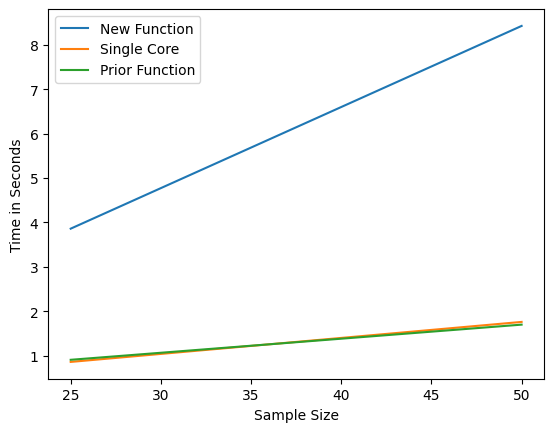

In [20]:
t = timing.plot(x='Observations')
t.set_xlabel("Sample Size")
t.set_ylabel("Time in Seconds")